In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('check_matrix10.csv')

In [5]:
df.head()

,Unnamed: 0,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant,sum_up,sentiment
0,0,0.020167,0.004421,0.015028,0.004612,0.447540,0.042667,0.015570,0.420350,0.025434,0.004212,4,Classified,2
1,1,0.358707,0.004925,0.000136,0.026358,0.035690,0.226569,0.254791,0.054331,0.025251,0.013243,0,Classified,0
2,2,0.010531,0.043265,0.110094,0.003902,0.030772,0.031816,0.003647,0.727584,0.032621,0.005768,7,Classified,0
3,3,0.333694,0.026932,0.063704,0.001345,0.030896,0.408619,0.036160,0.063211,0.013705,0.021734,5,Classified,2
4,4,0.008226,0.287462,0.037208,0.002844,0.085829,0.081811,0.006085,0.201460,0.001353,0.287722,9,Classified,2


In [9]:
df.groupby(['dominant','sentiment'])['Unnamed: 0'].count()

dominant  sentiment
0         0            11754
          1             1320
          2            35301
1         0             2072
          1              404
          2            16372
2         0             4198
          1              447
          2            12256
3         0             3938
          1              165
          2            21945
4         0            22540
          1              692
          2            33849
5         0            19500
          1              371
          2            39124
6         0             7540
          1              132
          2            14664
7         0            10693
          1              484
          2            26172
8         0             5465
          1              286
          2             8925
9         0             5123
          1              218
          2            14172
Name: Unnamed: 0, dtype: int64

TypeError: barh() missing 1 required positional argument: 'width'

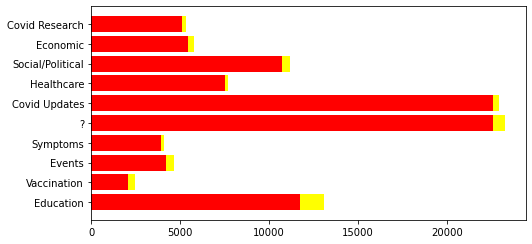

In [17]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

topics = ['Education','Vaccination','Events','Symptoms','?','Covid Updates','Healthcare','Social/Political','Economic','Covid Research']
negative = [11754,2072,4198,3938,22540,22540,7540,10693,5465,5123]
neutral = [1320,404,447,165,692,371,132,484,286,218]
positive = [35301,16372,12256,21945,33849,39124,14664,26172,8925,8925]

b1 = plt.barh(topics, negative, color="red")

b2 = plt.barh(topics, neutral, left=negative, color="yellow")

b3 = plt.barh(topics, right=positive, color="blue")

plt.legend([b1, b2, b3], ["Negative", "Neutral", "Positive"], title="Sentiment", loc="upper right")

plt.show()

In [19]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Negative','Neutral','Positive']
results = {
    'Education': [11754,1320,35301],
    'Topic1': [2072,404,16372],
    'Topic2': [4198,447,12256],
    'Topic3': [3938,165,21945],
    'Topic4': [22540,692,33849],
    'Topic5': [19500,371,39124],
    'Topic6': [7540,132,14664],
    'Topic7': [10693,484,26172],
    'Topic8': [5465,286,8925],
    'Topic9': [5123,218,14172]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

TypeError: 'function' object is not subscriptable